In [1]:
!git clone https://github.com/hungpham13/Distributed-data-discretization
%cd Distributed-data-discretization/
!pip install -r requirements.txt

Cloning into 'Distributed-data-discretization'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (76/76), done.
remote: Total 102 (delta 56), reused 48 (delta 23), pack-reused 0
Receiving objects: 100% (102/102), 22.19 MiB | 32.70 MiB/s, done.
Resolving deltas: 100% (56/56), done.
/content/Distributed-data-discretization
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 283 kB 36.3 MB/s 


In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# data_true = pd.read_csv('2021D1.csv')
# data_false = pd.read_csv('OtherD1.csv')

In [ ]:
# data_true['Label'] = 0
# data_false['Label'] = 1
# data = pd.concat([data_true,data_false], ignore_index=True)
# data = data.drop(columns='Unnamed: 0')
# data = data.sample(frac=1, ignore_index=True)

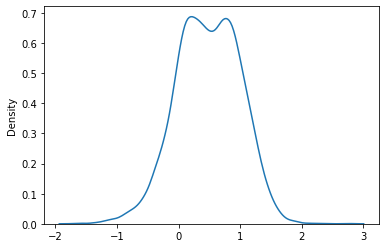

Choose this config (y/n): n


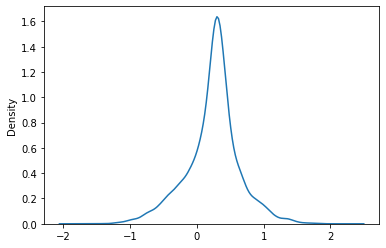

Choose this config (y/n): n


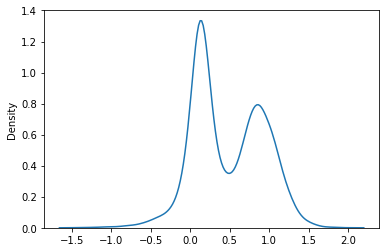

Choose this config (y/n): n


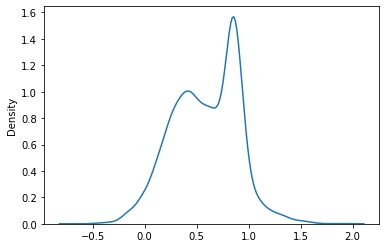

Choose this config (y/n): y


,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Label
0,0.313561,0.162038,-0.052652,0.859375,0.198391,0.293707,0.162016,0.634069,0.209403,0.594103,...,0.520408,0.863643,0.395637,0.338337,-0.274907,0.133287,0.265682,0.209264,0.387984,0
1,0.276100,0.496961,0.593039,0.404446,0.389869,0.421228,0.127819,0.273855,0.180789,0.227135,...,0.587661,-0.028975,0.427657,0.280915,0.289734,0.157882,0.349275,0.147305,0.773845,0
2,0.026300,0.242066,0.252278,0.315968,0.008270,0.291532,0.915596,0.542114,0.097496,0.259512,...,0.272726,-0.247720,0.600324,-0.029963,0.392989,0.257498,0.815457,0.442759,0.157373,0
3,0.155459,0.602381,0.107124,0.221449,0.381791,0.500113,0.492781,0.625283,0.575683,0.519937,...,0.085763,0.482537,0.502615,0.358894,-0.072369,-0.122011,0.227613,-0.189933,0.823480,0
4,0.351122,0.266244,0.158523,0.231552,0.377079,0.325008,0.755849,0.181207,0.102139,0.582755,...,0.719466,0.262441,0.668203,0.678945,0.577588,0.137494,0.120276,0.347453,0.312646,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.470738,0.439357,0.355093,0.326861,0.380160,0.329657,0.449417,0.594747,0.763068,0.584642,...,-0.399592,-0.155960,0.082511,-0.111391,0.791025,-0.076260,0.514683,0.781473,0.076251,0
496,0.214552,0.085866,0.374441,0.219397,0.567963,0.210292,0.009579,0.383439,0.331308,0.360728,...,0.312028,0.143481,0.131965,0.376971,0.482867,0.749156,0.388070,0.017766,0.348232,0
497,0.413275,0.361519,0.395453,0.371711,-0.017628,0.258093,0.289239,0.154627,0.378286,0.203388,...,0.589008,-0.106187,0.435798,0.694940,0.618574,0.506405,0.189084,0.167437,0.374131,0
498,0.292242,0.370611,0.118308,0.470876,0.195636,0.817350,0.153367,0.155933,0.414246,0.788922,...,0.389621,0.542498,0.116259,0.049631,0.005325,0.234322,0.259719,0.217348,0.366084,0


In [3]:
# data = pd.read_csv('data.csv')
# data = data.drop(columns='Unnamed: 0')
# data
from data.gen_data import generate_data
train, test = generate_data(num_train=500, num_test=200, true_ratio=0.9, visualize=False, num_sample=10000, bin_num=5)
train

In [4]:
from psi import calculate_psi
from psi import get_breakpoint

In [5]:
psi_list = []
false_index = []
predict = []
label = []
data_distribution = train.drop(columns=['Label'])
breakpoints = get_breakpoint(data_distribution.to_numpy().reshape(-1), buckettype='bins', buckets=10)

for i in range(len(test)-1):
    psi = calculate_psi(expected=test.loc[i], actual=test.loc[i+1], breakpoints=breakpoints)
    psi_list.append(psi)
    label.append(test['Label'].loc[i] | test['Label'].loc[i+1])
    if psi > 0.1:
        predict.append(1)
        false_index.append(i)
    else: 
        predict.append(0)

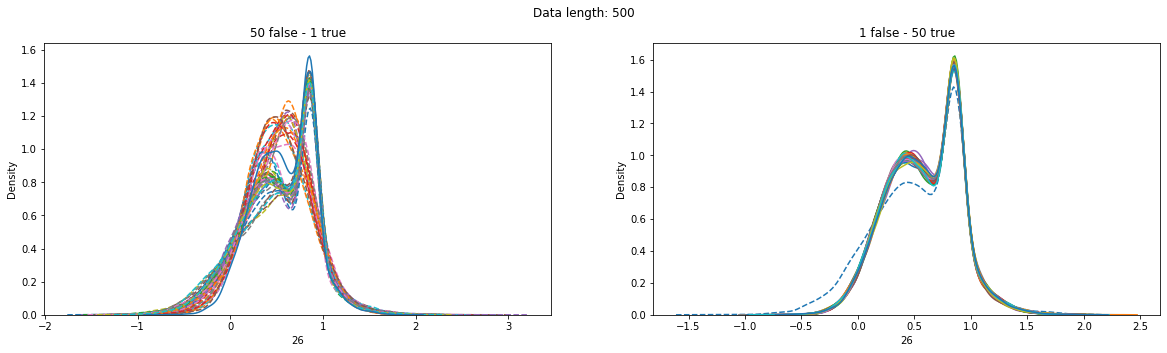

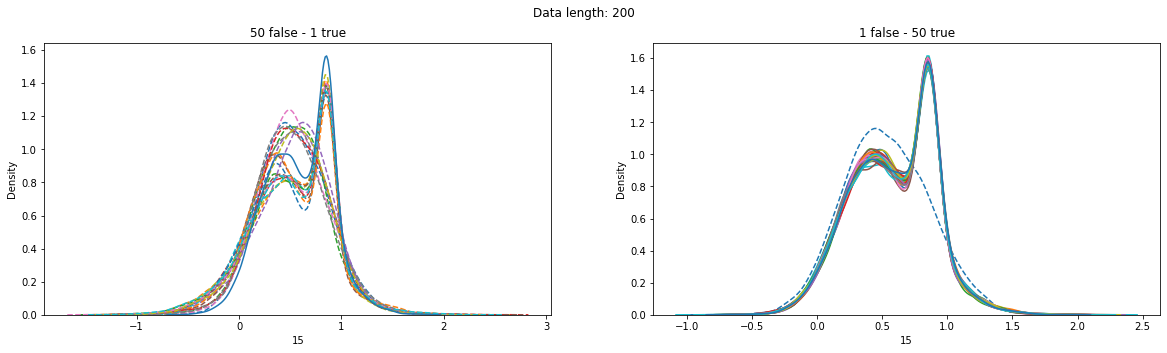

In [17]:
def visualize(data):
    df_false = pd.concat([data[data.Label==1].iloc[:50], data[data.Label==0].iloc[:1]])
    df_true = pd.concat([data[data.Label==1].iloc[:1], data[data.Label==0].iloc[:50]])

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,5))
    for i, row in df_false.iterrows():
        sns.kdeplot(row, linestyle= '--' if row.Label==1 else '-', ax=ax1)
    for i, row in df_true.iterrows():
        sns.kdeplot(row, linestyle= '--' if row.Label==1 else '-', ax=ax2)

    ax1.set_title('50 false - 1 true')
    ax2.set_title('1 false - 50 true')
    fig.suptitle(f'Data length: {len(data)}')

visualize(train)
visualize(test)

In [11]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(label, predict))
print(classification_report(label, predict))


[[162   0]
 [ 18  19]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       162
           1       1.00      0.51      0.68        37

    accuracy                           0.91       199
   macro avg       0.95      0.76      0.81       199
weighted avg       0.92      0.91      0.90       199



In [ ]:
Truth_False_index = []
for i in range(699):
    if data['Label'].loc[i]|data['Label'].loc[i+1] == 1:
        Truth_False_index.append(i)

In [ ]:
True_predict = list(set(Truth_False_index) & set(false_index))
True_predict.sort()
True_predict

[0,
 6,
 8,
 15,
 16,
 22,
 23,
 32,
 33,
 54,
 55,
 90,
 91,
 104,
 105,
 110,
 111,
 123,
 124,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 150,
 151,
 168,
 169,
 188,
 189,
 207,
 208,
 220,
 221,
 222,
 228,
 229,
 238,
 239,
 240,
 253,
 254,
 263,
 264,
 275,
 277,
 278,
 279,
 293,
 294,
 298,
 299,
 301,
 302,
 309,
 310,
 311,
 312,
 315,
 316,
 329,
 330,
 332,
 334,
 335,
 337,
 338,
 343,
 344,
 363,
 364,
 372,
 373,
 381,
 382,
 393,
 394,
 404,
 405,
 407,
 408,
 413,
 414,
 435,
 436,
 474,
 475,
 487,
 488,
 506,
 507,
 517,
 519,
 520,
 521,
 544,
 545,
 550,
 552,
 553,
 561,
 562,
 566,
 567,
 568,
 569,
 580,
 581,
 583,
 584,
 592,
 605,
 606,
 654,
 655,
 664,
 665,
 674,
 675,
 681,
 682,
 686,
 687]

In [ ]:
len(True_predict)

125

In [ ]:
acc = len(True_predict)/len(Truth_False_index)
acc

0.9541984732824428

<AxesSubplot:>

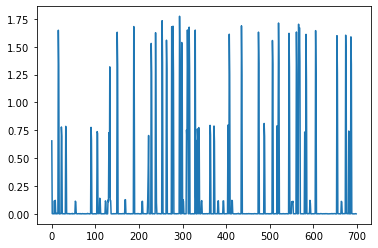

In [ ]:
sns.lineplot(x = [i for i in range(699)], y = psi_list)

In [ ]:
psi_list

[0.6554616446025187,
 0.00307836575997679,
 0.0016816819661602742,
 0.0017428896793646083,
 0.0018763501390288806,
 0.0015975776633448853,
 0.1187231136909347,
 0.0021978240511302135,
 0.12205671593718916,
 0.002081792025107919,
 0.001927601528525303,
 0.005609679946798963,
 0.0017932748837567538,
 0.002321044382126428,
 0.0029702382257913856,
 1.6473720101346967,
 1.3338092976223885,
 0.0003757204011596923,
 0.0006051267062459223,
 0.0024751673960933464,
 0.0017632389869012414,
 0.0019105321799705182,
 0.7799519214407544,
 0.6973027791410468,
 0.0023778842063447454,
 0.0013468578533110545,
 0.0012486121420377289,
 0.002303177703250898,
 0.0017057667486959297,
 0.0007595033755266891,
 0.0008007625724595911,
 0.001420934670916733,
 0.7855862722126412,
 0.6797232013303214,
 0.002874001460901058,
 0.002228300282938395,
 0.0019383228373762188,
 0.0027691890636620383,
 0.002571415406327669,
 0.002203110867574051,
 0.0035659049587503495,
 0.0006075222125100342,
 0.001016310522956398,
 0.0013

0.1187231136909347


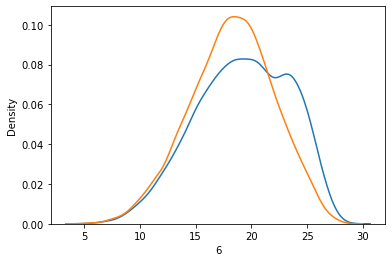

In [ ]:
sns.kdeplot(data_distribution.loc[6])
sns.kdeplot(data_distribution.loc[7])
print(psi_list[6])

0.0021978240511302135


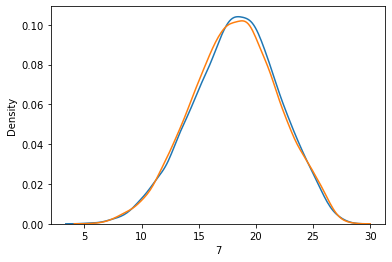

In [ ]:
sns.kdeplot(data_distribution.loc[7])
sns.kdeplot(data_distribution.loc[8])
print(psi_list[7])

0.12205671593718916


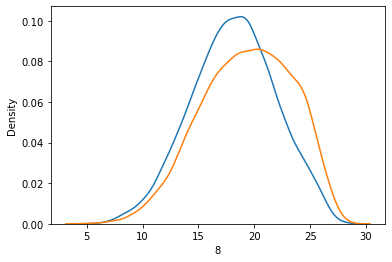

In [ ]:
sns.kdeplot(data_distribution.loc[8])
sns.kdeplot(data_distribution.loc[9])
print(psi_list[8])